In [200]:
pd.set_option('max_columns',500)
import warnings
warnings.filterwarnings('ignore')

In [143]:
import numpy as np
import pandas as pd 
import pickle

data_path = "/Users/raghavatal/Developer/Data/Petfinder_DataMiningProject/petfinder-adoption-prediction"


train_df = pd.read_csv(data_path+'/train.csv')
test_df = pd.read_csv(data_path + "/test/test.csv")


train_copy_df = train_df.copy()
test_copy_df = test_df.copy()


def countNanInColumn(df,col):
    count = df.loc[df[col].isnull(),col].shape[0]
    return count

def replaceNanWithValue(df,col,value):
    count = countNanInColumn(df,col)
    df.loc[df[col].isnull(),col] = value
    return count


count = replaceNanWithValue(train_copy_df,'Name','No Name')
#print('Values Replaced: {}'.format(count))

count = replaceNanWithValue(test_copy_df,'Name','No Name')
#print('Values Replaced: {}'.format(count))


train_copy_df['NumColors'] = train_copy_df.loc[:,'Color1':'Color3'].apply(lambda row: bool(row.Color1)
                                                         + bool(row.Color2) 
                                                         + bool(row.Color3),axis=1)

test_copy_df['NumColors'] = test_copy_df.loc[:,'Color1':'Color3'].apply(lambda row: bool(row.Color1)
                                                         + bool(row.Color2) 
                                                         + bool(row.Color3),axis=1)

train_copy_df['IsMixedBreed'] = train_copy_df.loc[:,'Breed1':'Breed2'].apply(lambda row: bool(row.Breed1)*bool(row.Breed2),axis=1)
test_copy_df['IsMixedBreed'] = test_copy_df.loc[:,'Breed1':'Breed2'].apply(lambda row: bool(row.Breed1)*bool(row.Breed2),axis=1)


nameFrequency_df = pd.DataFrame(train_copy_df['Name'].value_counts())
train_copy_df['NameFrequency'] = nameFrequency_df.loc[train_copy_df['Name'],'Name'].values


nameFrequency_df = pd.DataFrame(test_copy_df['Name'].value_counts())
test_copy_df['NameFrequency'] = nameFrequency_df.loc[test_copy_df['Name'],'Name'].values

sentiment_df = pd.read_csv(data_path+'/Processed/sentiment.csv')
sentiment_df.set_index('PetID')
(left ,right, key)  = (train_copy_df ,sentiment_df[['PetID','Magnitude','Score']],'PetID')
train_copy_df=pd.merge(left, right, on=key,how='left')


(left ,right, key)  = (test_copy_df ,sentiment_df[['PetID','Magnitude','Score']],'PetID')
test_copy_df=pd.merge(left, right, on=key,how='left')


train_copy_df.loc[train_copy_df['Magnitude'].isnull(),'Magnitude'] = 0.0
train_copy_df.loc[train_copy_df['Score'].isnull(),'Score'] = 0.0

test_copy_df.loc[test_copy_df['Magnitude'].isnull(),'Magnitude'] = 0.0
test_copy_df.loc[test_copy_df['Score'].isnull(),'Score'] = 0.0


train_copy_df.loc[train_copy_df['Description'].isnull(),'Description'] = ''
test_copy_df.loc[test_copy_df['Description'].isnull(),'Description'] = ''

train_copy_df['WordCount'] = train_copy_df['Description'].str.split().apply(lambda x: len(x))
test_copy_df['WordCount'] = test_copy_df['Description'].str.split().apply(lambda x: len(x))


# train_copy_df = train_copy_df.drop('Description',axis=1)
# test_copy_df = test_copy_df.drop('Description',axis=1)


#train_copy_df['AdoptionSpeed'] = train_copy_df['AdoptionSpeed'].astype('int',errors='ignore').fillna(0)







In [144]:
np.sum(train_copy_df['AdoptionSpeed'].isnull())

0

In [145]:
train_copy_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,NumColors,IsMixedBreed,NameFrequency,Magnitude,Score,WordCount
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,2,0,1,2.4,0.3,69
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,2,0,22,0.7,-0.2,23
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,2,0,1,3.7,0.2,69
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,2,0,11,0.9,0.9,25
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,1,0,5,3.7,0.6,81


In [372]:
train_copy_df.groupby(['AdoptionSpeed'])['AdoptionSpeed'].count()

AdoptionSpeed
0.0     410
1.0    3090
2.0    4037
3.0    3259
4.0    4197
Name: AdoptionSpeed, dtype: int64

### Description Character Count

In [146]:
train_copy_df['DescrLength'] = train_copy_df['Description'].str.len()

In [147]:
test_copy_df['DescrLength'] = test_copy_df['Description'].str.len()

### Check state-wise adoption speed split

In [148]:
train_copy_df['State'].value_counts()

41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

In [149]:
#how many states are in the training dataset
uniqueTrainStates = train_copy_df['State'].unique()
print('Num of States in Training Dataset: {}'.format(len(uniqueTrainStates)))

#how many states are in the test dataset
uniqueTestStates = test_copy_df['State'].unique()
print('Num of States in Test Dataset: {}'.format(len(uniqueTestStates)))

#which is the missing state in test dataset
print('Missing state in Test Dataset is: {}'.format(set(uniqueTrainStates) - set(uniqueTestStates)))

#Read State names from the state.csv
state_labels_df = pd.read_csv(data_path+'/state_labels.csv')
print(state_labels_df)

Num of States in Training Dataset: 14
Num of States in Test Dataset: 13
Missing state in Test Dataset is: {41415}
    StateID        StateName
0     41336            Johor
1     41325            Kedah
2     41367         Kelantan
3     41401     Kuala Lumpur
4     41415           Labuan
5     41324           Melaka
6     41332  Negeri Sembilan
7     41335           Pahang
8     41330            Perak
9     41380           Perlis
10    41327     Pulau Pinang
11    41345            Sabah
12    41342          Sarawak
13    41326         Selangor
14    41361       Terengganu


In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
state_count = train_copy_df['State'].value_counts()

In [209]:
state_count = pd.DataFrame({'State':state_count.index,'Count':state_count.values})

In [206]:
state_count['StateName'] = state_count['State'].map(state_labels_df.set_index('StateID')['StateName'])

In [152]:
#analyze adoption speed per state for training data set
adoptionPerState = train_copy_df.groupby(['State','AdoptionSpeed'])['AdoptionSpeed'].count()
adoptionPerState = adoptionPerState.unstack()
adoptionPerState = adoptionPerState.fillna(0)

adoptionPerState['Total']=adoptionPerState.iloc[:,0:5].apply(np.sum,axis=1)
adoptionPerState['0%']=np.round(adoptionPerState.iloc[:,0]*100/adoptionPerState['Total'],2)
totalAdoptions = train_copy_df.shape[0]
adoptionPerState['%OfTotal'] = np.round(adoptionPerState['Total']*100/totalAdoptions,2)
adoptionPerState['StateName'] = adoptionPerState.reset_index()['State'].map(state_labels_df.set_index('StateID')
                                                                            ['StateName']).values
adoptionPerState = adoptionPerState.sort_values('Total',ascending=False)
adoptionPerState

AdoptionSpeed,0,1,2,3,4,Total,0%,%OfTotal,StateName
State,,,,,,,,,
41326,246.0,1877.0,2435.0,2004.0,2152.0,8714.0,2.82,58.12,Selangor
41401,112.0,814.0,996.0,731.0,1192.0,3845.0,2.91,25.65,Kuala Lumpur
41327,8.0,122.0,216.0,197.0,300.0,843.0,0.95,5.62,Pulau Pinang
41336,23.0,113.0,136.0,103.0,132.0,507.0,4.54,3.38,Johor
41330,3.0,48.0,111.0,117.0,141.0,420.0,0.71,2.80,Perak
41332,4.0,36.0,63.0,42.0,108.0,253.0,1.58,1.69,Negeri Sembilan
41324,4.0,18.0,23.0,12.0,80.0,137.0,2.92,0.91,Melaka
41325,3.0,14.0,34.0,23.0,36.0,110.0,2.73,0.73,Kedah
41335,3.0,29.0,14.0,16.0,23.0,85.0,3.53,0.57,Pahang


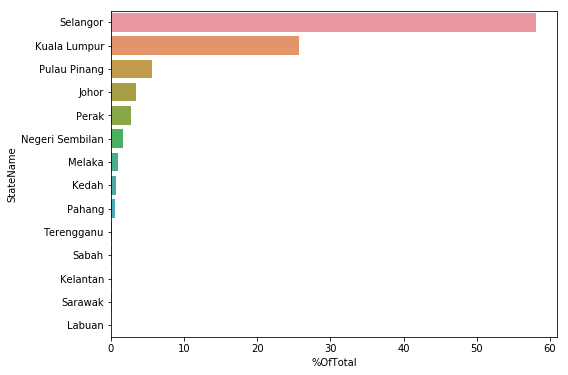

In [153]:
plt.figure(figsize=(8,6))
sns.set_color_codes("pastel")
sns.barplot(y = adoptionPerState['StateName'], x = adoptionPerState['%OfTotal']);

In [154]:
test_copy_df['State'].value_counts()

41326    2018
41401    1279
41327     229
41336     136
41330     104
41332      55
41324      47
41325      45
41342      22
41345       7
41367       2
41361       2
41335       2
Name: State, dtype: int64

### Create StateLevel Feature

In [156]:
#Map States to:-
# 41326 :0
# 41401 :1
# Others : 3

train_copy_df['StateLevel'] = train_copy_df['State'].map({41326:0,41401:1}).fillna(2).astype('int')
print(train_copy_df['StateLevel'].value_counts())

test_copy_df['StateLevel'] = test_copy_df['State'].map({41326:0,41401:1}).fillna(2).astype('int')
print(test_copy_df['StateLevel'].value_counts())

0    8714
1    3845
2    2434
Name: StateLevel, dtype: int64
0    2018
1    1279
2     651
Name: StateLevel, dtype: int64


### Create IsHealthy feature by combining Vaccinated,Dewormed,Sterlized and Health features

In [235]:
train_copy_df['Vaccinated'].value_counts()

2    7227
1    5898
3    1868
Name: Vaccinated, dtype: int64

In [236]:
train_copy_df['Health'].value_counts()

1    14478
2      481
3       34
Name: Health, dtype: int64

In [237]:
test_copy_df['Health'].value_counts()

1    3788
2     148
3      12
Name: Health, dtype: int64

In [157]:
train_copy_df['IsHealthy'] = (train_copy_df['Vaccinated'] 
                                + train_copy_df['Sterilized']
                                + train_copy_df['Health'])


test_copy_df['IsHealthy'] = (test_copy_df['Vaccinated'] 
                                + test_copy_df['Sterilized']
                                + test_copy_df['Health'])
#test_copy_df.head()

### Analyze RescuerID

In [158]:
train_copy_df['RescuerID'].value_counts()

fa90fa5b1ee11c86938398b60abc32cb    459
aa66486163b6cbc25ea62a34b11c9b91    315
c00756f2bdd8fa88fc9f07a8309f7d5d    231
b53c34474d9e24574bcec6a3d3306a0d    228
ee2747ce26468ec44c7194e7d1d9dad9    156
95481e953f8aed9ec3d16fc4509537e8    134
b770bac0ca797cf1433c48a35d30c4cb    111
a042471e0f43f2cf707104a1a138a7df     95
fd970cc91d06d82eebf046340137b272     93
7ed6d84e2e6879245e55447aee39c328     85
e62135526c27156b8479420aad166317     77
438a9bdce8ef4d5948fc40e422d34d0d     75
8b6c5cd067ada5f54ca5ffc7f7b5d896     74
cccb18b8f8b81862f9a1ebc65d651d22     65
001e42763024f9d4abe31e79472b1827     61
530f57b53cb3199e1d5e67733ddc0876     60
3b074cadd2350de62dca7056b9bab6f4     59
db784cbcf321e1d8856b312638b94113     52
3223e1c4cb2bef48823ee5c604b9aa04     52
9238e4f44c71a75282e62f7136c6b240     50
7b107e61f7d24a581e46e0abc4d2a7a7     48
78ec79634d350f6850fdd4a335cab431     47
f45d8c72a87f27427cd28fc3cd2d7ce3     46
88a21c30883ab70a93e09035e0a9a754     44
2e53c8cd2454a77eb195a039ee28b8f6     44


In [159]:
#analyze adoption speed per rescuer id for training data set
adoptionPerRescuer = train_copy_df.groupby(['RescuerID','AdoptionSpeed'])['AdoptionSpeed'].count()
adoptionPerRescuer = adoptionPerRescuer.unstack()
adoptionPerRescuer = adoptionPerRescuer.fillna(0)
adoptionPerRescuer['Total']=adoptionPerRescuer.iloc[:,0:5].apply(np.sum,axis=1)
adoptionPerRescuer['0%']=np.round(adoptionPerRescuer.iloc[:,0]*100/adoptionPerRescuer['Total'],2)
adoptionPerRescuer = adoptionPerRescuer.sort_values('Total',ascending=False)
adoptionPerRescuer.head(50)

AdoptionSpeed,0,1,2,3,4,Total,0%
RescuerID,,,,,,,
fa90fa5b1ee11c86938398b60abc32cb,12.0,44.0,173.0,223.0,7.0,459.0,2.61
aa66486163b6cbc25ea62a34b11c9b91,1.0,46.0,93.0,112.0,63.0,315.0,0.32
c00756f2bdd8fa88fc9f07a8309f7d5d,1.0,29.0,99.0,86.0,16.0,231.0,0.43
b53c34474d9e24574bcec6a3d3306a0d,4.0,52.0,76.0,86.0,10.0,228.0,1.75
ee2747ce26468ec44c7194e7d1d9dad9,4.0,10.0,28.0,24.0,90.0,156.0,2.56
95481e953f8aed9ec3d16fc4509537e8,2.0,42.0,48.0,42.0,0.0,134.0,1.49
b770bac0ca797cf1433c48a35d30c4cb,1.0,43.0,44.0,19.0,4.0,111.0,0.90
a042471e0f43f2cf707104a1a138a7df,0.0,6.0,32.0,32.0,25.0,95.0,0.00
fd970cc91d06d82eebf046340137b272,0.0,26.0,30.0,26.0,11.0,93.0,0.00


#### Convert Rescuer ID to numerical code

In [160]:
train_rows = train_copy_df.shape[0]
test_rows = test_copy_df.shape[0]
train_rows 

18941

In [161]:
con_df = pd.concat([train_copy_df,test_copy_df])

/Users/raghavatal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [162]:
con_df['RescuerID'] = pd.Categorical(con_df['RescuerID']).codes

In [164]:
con_df.shape

(18941, 33)

**Create Feature NumPosts from a rescuer**

In [193]:
numPosts = con_df['RescuerID'].value_counts()
numPosts_df = pd.DataFrame({'RescuerId':numPosts.index,'numPosts':numPosts.values})
con_df['RescuerNumPosts']=con_df['RescuerID'].map(numPosts_df.set_index('RescuerId')['numPosts'])

In [196]:
#Again separate out the train and test sets
train_copy_df = con_df.iloc[:train_rows,]
test_copy_df = con_df.iloc[train_rows:,]

In [197]:
train_copy_df.shape

(14993, 34)

In [198]:
test_copy_df.shape

(3948, 34)

In [199]:
train_copy_df.shape[0] + test_copy_df.shape[0]

18941

### Check if there are any rescuers missing in Test set

In [ ]:
set(test_copy_df['RescuerID']) - set(train_copy_df['RescuerID'])

**Many rescuers are missing in test set. Cannot create adoption speed count for each rescuer**

### Create Breed Ranking 

In [215]:
con_df = pd.concat([train_copy_df,test_copy_df])
con_df.shape

(18941, 34)

In [217]:
breed_ranking = con_df['Breed1'].value_counts()
breed_ranking.head()

307    7220
266    4742
265    1609
299     496
264     397
Name: Breed1, dtype: int64

In [223]:
breed_ranks = breed_ranking.rank(ascending=False).astype('int')
breed_ranks_df = pd.DataFrame({'Breed1':breed_ranks.index,'Rank':breed_ranks.values})
breed_ranks_df.head()

,Breed1,Rank
0,307,1
1,266,2
2,265,3
3,299,4
4,264,5


In [224]:
con_df['BreedRank']=con_df['Breed1'].map(breed_ranks_df.set_index('Breed1')['Rank'])

In [ ]:
con_df.head()

In [226]:
#Again separate out the train and test sets
train_copy_df = con_df.iloc[:train_rows,]
test_copy_df = con_df.iloc[train_rows:,]
print(train_copy_df.shape)
print(test_copy_df.shape)

(14993, 35)
(3948, 35)


### Create Feature boundary for Fee >= 100 or < 100

In [240]:
train_copy_df['FeeCat'] = train_copy_df['Fee'].apply(lambda x: 0 if x <100 else 1)

In [241]:
test_copy_df['FeeCat'] = test_copy_df['Fee'].apply(lambda x: 0 if x <100 else 1)

### Create Feature Word Rate

In [249]:
train_copy_df['WordRate'] = train_copy_df['DescrLength']/train_copy_df['WordCount']
train_copy_df['WordRate'] = train_copy_df['WordRate'].fillna(0)

In [250]:
test_copy_df['WordRate'] = test_copy_df['DescrLength']/test_copy_df['WordCount']
test_copy_df['WordRate'] = test_copy_df['WordRate'].fillna(0)

### Normalize quantity

In [313]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
std_quantity = scaler.fit_transform(train_copy_df['Quantity'].values.reshape(-1,1))
train_copy_df['NormQuantity'] = std_quantity

std_quantity = scaler.fit_transform(test_copy_df['Quantity'].values.reshape(-1,1))
test_copy_df['NormQuantity'] = std_quantity

In [311]:
std_quantity =pd.Series(std_quantity.reshape(14993,))

In [312]:
pd.concat([train_copy_df['Quantity'],std_quantity],axis=1)

,Quantity,0
0,1,0.000000
1,1,0.000000
2,1,0.000000
3,1,0.000000
4,1,0.000000
5,1,0.000000
6,1,0.000000
7,6,0.263158
8,1,0.000000
9,1,0.000000


### Has Video

In [255]:
train_copy_df['VideoAmt'].value_counts()

0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: VideoAmt, dtype: int64

In [257]:
train_copy_df['HasVideos'] = train_copy_df['VideoAmt'].apply(lambda x : 1 if x > 0 else 0)

In [258]:
test_copy_df['HasVideos'] = test_copy_df['VideoAmt'].apply(lambda x : 1 if x > 0 else 0)

### IsSingle Puppy

In [259]:
train_copy_df['Quantity'].value_counts()

1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
13        2
14        2
18        1
Name: Quantity, dtype: int64

In [260]:
train_copy_df['IsSinglePet'] = train_copy_df['Quantity'].apply(lambda x : 1 if x == 1 else 0)

In [261]:
test_copy_df['IsSinglePet'] = test_copy_df['Quantity'].apply(lambda x : 1 if x == 1 else 0)

In [262]:
train_copy_df.head()

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,DescrLength,Description,Dewormed,Fee,FurLength,Gender,Health,IsHealthy,IsMixedBreed,Magnitude,MaturitySize,Name,NameFrequency,NumColors,PetID,PhotoAmt,Quantity,RescuerID,Score,State,StateLevel,Sterilized,Type,Vaccinated,VideoAmt,WordCount,RescuerNumPosts,BreedRank,FeeCat,WordRate,IsSinglePet
0,2,3,299,0,1,7,0,359,Nibble is a 3+ month old ball of cuteness. He ...,2,100,1,1,1,7,0,2.4,1,Nibble,1,2,86e1089a3,1,1,3734,0.3,41326,0,2,2,2,0,69,8,4,1,5.202899,1
1,0,1,265,0,1,2,0,118,I just found it alone yesterday near my apartm...,3,0,2,1,1,10,0,0.7,2,No Name Yet,22,2,6296e909a,2,1,1408,-0.2,41401,1,3,2,3,0,23,1,3,0,5.130435,1
2,3,1,307,0,2,7,0,393,Their pregnant mother was dumped by her irresp...,1,0,2,1,1,5,0,3.7,2,Brisco,1,2,3422e4906,7,1,6965,0.2,41326,0,2,1,1,0,69,459,1,0,5.695652,1
3,2,4,307,0,1,2,0,146,"Good guard dog, very alert, active, obedience ...",1,150,1,2,1,5,0,0.9,2,Miko,11,2,5842f1ff5,8,1,4107,0.9,41401,1,2,1,1,0,25,50,1,1,5.840000,1
4,2,1,307,0,1,0,0,390,This handsome yet cute boy is up for adoption....,2,0,1,1,1,7,0,3.7,2,Hunter,5,1,850a43f90,3,1,4191,0.6,41326,0,2,1,2,0,81,134,1,0,4.814815,1


### Create feature IsRightAge

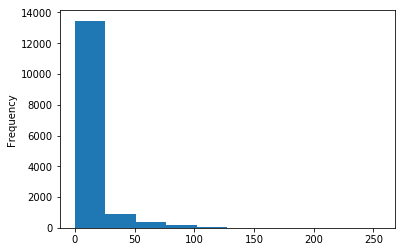

In [324]:
train_copy_df['Age'].plot(kind='hist');

In [325]:
train_copy_df.groupby(['AdoptionSpeed'])['Age'].min()

AdoptionSpeed
0    0
1    0
2    0
3    0
4    0
Name: Age, dtype: int64

**Assign pets with age less than equal to 10 as right age = 1 and above 10 as 0**

In [328]:
train_copy_df['IsRightAge'] = train_copy_df['Age'].apply(lambda x : 1 if x <=10 else 0 )

In [329]:
test_copy_df['IsRightAge'] = test_copy_df['Age'].apply(lambda x : 1 if x <=10 else 0 )

### Create feature is reproductive for famale pets not sterlized

In [330]:
train_copy_df['Gender'].value_counts()

2    7277
1    5536
3    2180
Name: Gender, dtype: int64

In [332]:
train_copy_df.loc[(train_copy_df['Sterilized']==2) & (train_copy_df['Gender']==2),'IsReproductive'] = 1
train_copy_df['IsReproductive'] = train_copy_df['IsReproductive'].fillna(0)

In [336]:
train_copy_df['IsReproductive'].value_counts()

0.0    10349
1.0     4644
Name: IsReproductive, dtype: int64

In [337]:
test_copy_df.loc[(test_copy_df['Sterilized']==2) & (test_copy_df['Gender']==2),'IsReproductive'] = 1
test_copy_df['IsReproductive'] = test_copy_df['IsReproductive'].fillna(0)
test_copy_df['IsReproductive'].value_counts()

0.0    2833
1.0    1115
Name: IsReproductive, dtype: int64

### Create feature OverallQualityOfPetsByRescuer

In [361]:
con_df = pd.concat([train_copy_df,test_copy_df])
con_df.shape

(18941, 41)

In [362]:
fil = (con_df['Health']==1) & (con_df['Dewormed']==1) & (con_df['Vaccinated']==1)

healthyPetsByEachREscuer = con_df[fil].groupby('RescuerID')['Quantity'].sum()
healthyPetsByEachREscuer = pd.DataFrame({'RescuerID':healthyPetsByEachREscuer.index,'Count':healthyPetsByEachREscuer.values})

con_df['HighQualityPetsByRescuer'] = con_df['RescuerID'].map(healthyPetsByEachREscuer.set_index('RescuerID')['Count'])

con_df['HighQualityPetsByRescuer'] = con_df['HighQualityPetsByRescuer'].fillna(0)
con_df['HighQualityPetsByRescuer'] = con_df['HighQualityPetsByRescuer'].astype('int')

In [364]:
#Again separate out the train and test sets
train_copy_df = con_df.iloc[:train_rows,]
test_copy_df = con_df.iloc[train_rows:,]
print(train_copy_df.shape)
print(test_copy_df.shape)

(14993, 42)
(3948, 42)


### Write output pkl files

In [228]:
train_copy_df['AdoptionSpeed'] = train_copy_df['AdoptionSpeed'].astype('int',errors='ignore')

In [232]:
train_copy_df['PhotoAmt'] = train_copy_df['PhotoAmt'].astype('int',errors='ignore')
test_copy_df['PhotoAmt'] = test_copy_df['PhotoAmt'].astype('int',errors='ignore')

In [246]:
train_copy_df.head()

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,DescrLength,Description,Dewormed,Fee,FurLength,Gender,Health,IsHealthy,IsMixedBreed,Magnitude,MaturitySize,Name,NameFrequency,NumColors,PetID,PhotoAmt,Quantity,RescuerID,Score,State,StateLevel,Sterilized,Type,Vaccinated,VideoAmt,WordCount,RescuerNumPosts,BreedRank,FeeCat,WordRate
0,2,3,299,0,1,7,0,359,Nibble is a 3+ month old ball of cuteness. He ...,2,100,1,1,1,7,0,2.4,1,Nibble,1,2,86e1089a3,1,1,3734,0.3,41326,0,2,2,2,0,69,8,4,1,5.202899
1,0,1,265,0,1,2,0,118,I just found it alone yesterday near my apartm...,3,0,2,1,1,10,0,0.7,2,No Name Yet,22,2,6296e909a,2,1,1408,-0.2,41401,1,3,2,3,0,23,1,3,0,5.130435
2,3,1,307,0,2,7,0,393,Their pregnant mother was dumped by her irresp...,1,0,2,1,1,5,0,3.7,2,Brisco,1,2,3422e4906,7,1,6965,0.2,41326,0,2,1,1,0,69,459,1,0,5.695652
3,2,4,307,0,1,2,0,146,"Good guard dog, very alert, active, obedience ...",1,150,1,2,1,5,0,0.9,2,Miko,11,2,5842f1ff5,8,1,4107,0.9,41401,1,2,1,1,0,25,50,1,1,5.840000
4,2,1,307,0,1,0,0,390,This handsome yet cute boy is up for adoption....,2,0,1,1,1,7,0,3.7,2,Hunter,5,1,850a43f90,3,1,4191,0.6,41326,0,2,1,2,0,81,134,1,0,4.814815


In [263]:
test_copy_df.head()

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,DescrLength,Description,Dewormed,Fee,FurLength,Gender,Health,IsHealthy,IsMixedBreed,Magnitude,MaturitySize,Name,NameFrequency,NumColors,PetID,PhotoAmt,Quantity,RescuerID,Score,State,StateLevel,Sterilized,Type,Vaccinated,VideoAmt,WordCount,RescuerNumPosts,BreedRank,FeeCat,WordRate,IsSinglePet
0,NaN,2,307,0,1,0,0,108,"Puppy is calm for a young dog, but he becomes ...",2,150,2,1,1,7,0,0.0,2,Puppy,11,1,378fcc4fc,3,1,1975,0.0,41326,0,2,1,2,0,20,146,1,1,5.400000,1
1,NaN,24,266,0,2,7,0,66,Urgently seeking adoption. Please contact for ...,1,0,1,1,1,4,0,0.0,2,London,3,2,73c10e136,1,1,1975,0.0,41326,0,1,2,1,0,8,146,2,0,8.250000,1
2,NaN,20,266,0,7,0,0,195,Snowball... doesn't look so good (she is healt...,1,150,1,2,1,4,0,0.0,2,Snowball,1,1,72000c4c5,1,1,1975,0.0,41326,0,1,2,1,0,36,146,2,1,5.416667,1
3,NaN,5,266,252,1,6,7,324,"Malibu: Female, Local Mix, 4-5 months, vaccina...",1,100,1,2,1,4,1,0.0,2,Malibu,1,3,e147a4b9f,1,1,1975,0.0,41326,0,1,2,1,0,51,146,2,1,6.352941,1
4,NaN,6,307,0,1,2,7,164,LALA! That's my name. I'm a 6 month old girl d...,1,150,1,2,1,4,0,0.0,2,Lala Girl,1,3,43fbba852,1,1,1975,0.0,41326,0,1,1,1,0,33,146,1,1,4.969697,1


In [251]:
train_copy_df.to_pickle('train_cleaned_Features_v3.pkl')
test_copy_df.to_pickle('test_cleaned_Features_v3.pkl')